# LAB2: DATA VISUALIZATION & PROCESSING IN PYTHON
In this lab you will practice Python data processing and visualization.


## Step 1: Access the datasets

You can access the data files for `Lab_2` on Canvas in the `Files/Lab 2` section of *TECHIN 510*, and then upload them to your local Jupyter server.
* Robot Faces data set
* People
* Pre-recorded accelerometer data

And you can incorporate them into your code using the sample code in the next cell.


In [2]:
## SAMPLE CODE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Let's declare a few URLs so that we can access the data from anywhere
robot_faces_url = 'https://raw.githubusercontent.com/sstevson/TECHIN_510_Wi_23/main/week_3/robot_faces.csv'
people_url = 'https://raw.githubusercontent.com/sstevson/TECHIN_510_Wi_23/main/week_3/people.csv'
accelerometer_url = 'https://raw.githubusercontent.com/sstevson/TECHIN_510_Wi_23/main/week_3/accelerometer.csv'
# Now let's create DataFrames for each data source
robots = pd.read_csv(robot_faces_url)
people = pd.read_csv(people_url)
accel = pd.read_csv(accelerometer_url)

## Initial Exploration of Data
What data types exist in the robots CSV? And can we see a count of their unique values?

In [3]:
robots.dtypes

Name                        object
Unnamed: 1                   int64
robot type                  object
category                    object
full head                   object
                             ...  
cheek placement             object
cheek spacing               object
hair color                  object
country/region of origin    object
year                        object
Length: 77, dtype: object

In [4]:
robots.nunique()

Name                        136
Unnamed: 1                   43
robot type                    3
category                     11
full head                     2
                           ... 
cheek placement               4
cheek spacing                 4
hair color                    6
country/region of origin     20
year                         17
Length: 77, dtype: int64

Let's convert the `full head` column to a Category for more efficient processing. Remember that Object types take up more room in memory.

This is just one example of where we can optimize across the DataFrame.

In [5]:
robots['full head'].astype('category')

0      y
1      y
2      y
3      y
4      y
      ..
131    x
132    x
133    x
134    x
135    x
Name: full head, Length: 136, dtype: category
Categories (2, object): ['x', 'y']

Since the change above looks good, let's make it permanent

In [6]:
robots['full head'] = robots['full head'].astype('category')

In [7]:
robots[['Name', 'full head']]

Name full head
0             Vanessa         y
1               EDGAR         y
2              FURo-S         y
3              FURo-D         y
4             SociBot         y
..                ...       ...
131       Baxter (12)         x
132               Eva         x
133    Gongzi Xiaobai         x
134  Baidu KFC Robot          x
135              Otto         x

[136 rows x 2 columns]

## Step 2: Robot face data exploration

Let's start by exploring the data in `robot_faces.csv`. First, write the code for loading and preprocessing the data. After inspecting the different column names to better understand what the data includes, pose a specific question and write new code to answer that question. Some example questions are:
* How many robots both have a mouth and a nose?
* Which country has the highest fraction of robots with black face color?
* Do more robots built after 2012 have blue eyes than those built before?

Your code should print the question at the beginning and print the computed answer at the end. Your script should also create at least one visualization that allows a human to answer the same question without having to do calculations.

*If you are interested, you can read more about the face data [here](https://spectrum.ieee.org/automaton/robotics/humanoids/what-people-see-in-157-robot-faces).*


In [8]:
# How many robots both have a mouth and a nose?
nose_and_mouth = robots[['Name','nose', 'mouth']] # Let's isolate only the columns we need
has_nose = nose_and_mouth['nose'] == 'y' # Select only 'y' values for the nose column
has_mouth = nose_and_mouth['mouth'] == 'y' # Now do the same for the mouth column
total = len(nose_and_mouth[has_nose & has_mouth]) # Let's see how many rows are in this transformed data
print(f"How many robots both have a mouth and a nose? Looks like there are {total}.")

How many robots both have a mouth and a nose? Looks like there are 28.


Text(0.5, 1.0, 'How Many Robots Have A Nose or Mouth?')

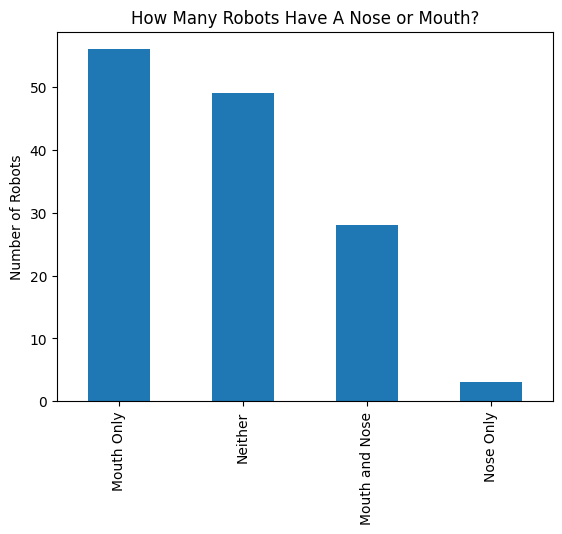

In [9]:
fig, ax = plt.subplots()
robots[['mouth', 'nose']].value_counts().plot(kind='bar')
ax.set_xticklabels(['Mouth Only', 'Neither', 'Mouth and Nose', 'Nose Only'])
ax.set_xlabel('')
ax.set_ylabel('Number of Robots')
ax.set_title('How Many Robots Have A Nose or Mouth?')

<AxesSubplot: ylabel='country/region of origin,face color'>

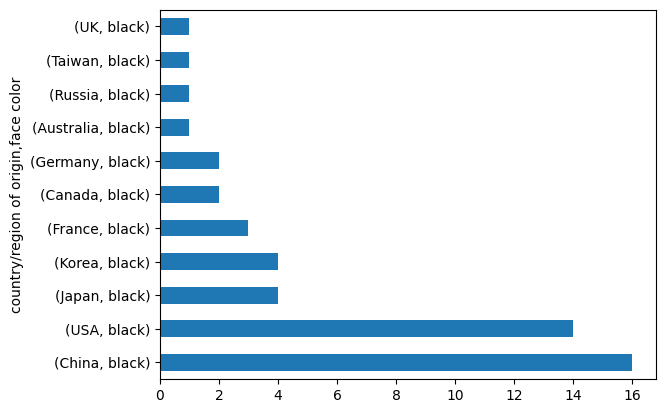

In [10]:
# Which country has the highest fraction of robots with black face color?
face_color = robots[['country/region of origin', 'face color']] # Again, isolate the columns we need
face_color.set_index('country/region of origin') # reset the index to use the country names
face_color_is_black = face_color['face color'] == 'black' # create a filter for only black face color
face_color[face_color_is_black] # apply that filter to the DataFrame
face_color[face_color_is_black].value_counts().plot(kind='barh')

In [11]:
# Determining the ratio of each country's count
face_color[face_color_is_black].groupby('country/region of origin').size() # Get the counts for each country

country/region of origin
Australia     1
Canada        2
China        16
France        3
Germany       2
Japan         4
Korea         4
Russia        1
Taiwan        1
UK            1
USA          14
dtype: int64

In [12]:
for country, count in face_color[face_color_is_black].groupby('country/region of origin').size().items():
    print(country, count)

Australia 1
Canada 2
China 16
France 3
Germany 2
Japan 4
Korea 4
Russia 1
Taiwan 1
UK 1
USA 14


In [13]:
total_black = len(face_color[face_color_is_black]) # Length of new DataFrame
country_counts = face_color[face_color_is_black].groupby('country/region of origin').size().items()
for c, n in country_counts:
    print(f"{c} accounted for {round((n / total_black) * 100)}% of robots with black faces.")

Australia accounted for 2% of robots with black faces.
Canada accounted for 4% of robots with black faces.
China accounted for 33% of robots with black faces.
France accounted for 6% of robots with black faces.
Germany accounted for 4% of robots with black faces.
Japan accounted for 8% of robots with black faces.
Korea accounted for 8% of robots with black faces.
Russia accounted for 2% of robots with black faces.
Taiwan accounted for 2% of robots with black faces.
UK accounted for 2% of robots with black faces.
USA accounted for 29% of robots with black faces.


In [14]:
# Do more robots built after 2012 have blue eyes than those built before?
subset = robots[['year', 'eye color']] # create a subset with only the columns we need
after_2012 = subset['year'] > '2012' # Filter for robots built during or after 2012
before_2012 = subset['year'] <= '2012' # Filter robots built before 2012
has_blue_eyes = subset['eye color'] == 'blue' # Filter for robots with blue eyes
blue_after_2012 = subset[after_2012 & has_blue_eyes]
blue_before_2012 = subset[before_2012 & has_blue_eyes]
len(blue_after_2012) > len(blue_before_2012)
print('Q: Do robots built before 2012 have blue eyes more often than those built after 2012?')
print(f'A: No. There were {len(blue_before_2012)} robots with blue eyes before 2012 and {len(blue_after_2012)} after.')

Q: Do robots built before 2012 have blue eyes more often than those built after 2012?
A: No. There were 6 robots with blue eyes before 2012 and 20 after.
